 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import math

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

trainingdata=[]
for i in mnist_traindata:
  trainingdata.append(i.flatten())
trainingdata=np.array(trainingdata)[:9000]
traininglabels=np.reshape(mnist_trainlabel,(mnist_trainlabel.shape[0],1))[:9000]


testdata=[]
for i in mnist_testdata:
  testdata.append(i.flatten())
testdata=np.array(testdata)
testlabels=np.reshape(mnist_testlabel,(mnist_testlabel.shape[0],1))


print(testdata.shape,testlabels.shape)


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
(10000, 784) (10000, 1)


In [ ]:


##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(X):
  # print(X.shape)
  # outp = [np.array([i if i >= 0 else 0 for i in inp]) for inp in X]
  # return np.array(outp)
  return np.maximum(X,0)

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(X):
  outp = np.array(X>0,dtype=np.float32)
  return outp


#Complete the below function to impliment softmax activation function
def softmax(inp):
  j=np.exp(inp)
  return j/np.sum(j,axis=0)

def gradsoftmax(inp):
  return np.diag(softmax(inp))-np.outer(softmax(inp),softmax(inp))


def inference(inp):
  g=np.zeros((inp.shape[0],10))
  for t in range(inp.shape[0]):
    g[t,inp[t,0]]=1
  return g

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights,h=ReLu,gradh=gradReLu):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  X=inputs.T
  z1=np.dot(W1,X)
  a1=h(z1)
  z2=np.dot(W2,a1)
  a2=h(z2)
  z3=np.dot(W3,a2)
  a3=softmax(z3)
  return a1,a2,a3
  #Return the requires outputs, i.e., final output and intermediate activations



#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations,h=ReLu,gradh=gradReLu,lamda=0):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights


  X=inputs.T
  y=targets.T
  a1,a2,a3=fwdPropagate(inputs,weights)
  m=inputs.shape[0]

  dz3=(a3-y)
  dw3=(1/m)*np.dot(dz3,a2.T)

  dz2=(1/m)*np.dot(W3.T,dz3)*gradh(a2)
  dw2=(1/m)*np.dot(dz2,a2.T)

  dz1=(1/m)*np.dot(W2.T,dz2)*gradh(a1)
  dw1=(1/m)*np.dot(dz1,X.T)

  return [dw1,dw2,dw3]



#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate,h=ReLu,gradh=gradReLu,lamda=0):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1=W1-learning_rate*(dj_dw1+lamda*W1)
  W2=W2-learning_rate*(dj_dw2+lamda*W2)
  W3=W3-learning_rate*(dj_dw3+lamda*W3)
  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate,h=ReLu,gradh=gradReLu,lamda=0):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations,h=h,gradh=gradReLu,lamda=lamda)
  weights = applyGradients(weights, gradients, learning_rate,h=ReLu,gradh=gradReLu,lamda=lamda)
  #Update the paramters using gradients

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, batch_size = 128, epochs=10, train_val_split=0.8, learning_rate=0.005, h=ReLu,gradh=gradReLu,lamda=0, n_classes = 10):

  #Set the hyperparameters
  hidden_units = 512
  n_samples = inputs.shape[0]
  n_batches = (0.9*n_samples)//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data

  trainx,trainy=inputs[:int(0.9*n_samples)],targets[:int(0.9*n_samples)]
  testx,testy=inputs[int(0.9*n_samples):],targets[int(0.9*n_samples):]

  #Randomly initialize the weights
  W1=np.random.randn(hidden_units,inputs.shape[1])*0.01
  W2=np.random.randn(hidden_units,hidden_units)*0.01
  W3=np.random.randn(n_classes,hidden_units)*0.01
  weights=[W1,W2,W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(trainx.shape[0])
    # Shuffle both arrays simultaneously
    trainxx = trainx[permutation]
    trainyy = trainy[permutation]
    #Interate through the batches of data
    # print("J ",trainxx.shape,trainyy.shape)
    for batch in range(int(n_batches)):
      #Get the batch of data
      start=int(batch*batch_size)
      input=trainxx[start:start+batch_size]
      target=trainyy[start:start+batch_size]
      # print("JK ",input.shape,target.shape)
      # print(target)
      #Forward propagation
      activations = fwdPropagate(input, weights,h,gradh)
      # print("T ",activations[2].shape)

      #Backward propagation
      weights = backPropagate(input, target, weights, activations, learning_rate,h,gradh,lamda)

    #Compute outpus on trianing data
    a,b,outputs=fwdPropagate(trainx, weights,h,gradh)

    #Compute training accuracy, and training error

    outputs=outputs.T

    correct=0
    for i in range(trainx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(trainy[i])):
        correct+=1
    train_acc=(correct/trainx.shape[0])*100
    train_err=100-train_acc


    #Compute outputs on validation data
    #Compute validation accuracy, and validation error
    a,b,outputs=fwdPropagate(testx,weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(testx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(testy[i])):
        correct+=1
    test_acc=(correct/testx.shape[0])*100
    test_err=100-test_acc




    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"The training error at {epoch} epochs is {train_err}, and training accuracy at {epoch} epochs is {train_acc}")
    print(f"The testing error at {epoch} epochs is {test_err}, and testing accuracy at {epoch} epochs is {test_acc}")
    #Save the parameters of network
  return weights


#Call the training function to train the network


##################################################
#Evaluate the performance on test data
##################################################

weights=training(trainingdata,inference(traininglabels),h=ReLu,gradh=gradReLu)
testx=testdata
testy=inference(testlabels)
a,b,outputs=fwdPropagate(testx,weights,h=ReLu,gradh=gradReLu)
outputs=outputs.T
correct=0
for i in range(testx.shape[0]):
  if(np.argmax(outputs[i])==np.argmax(testy[i])):
    correct+=1
test_acc=(correct/testx.shape[0])*100
test_err=100-test_acc
print(f"The testing error is {test_err}, and testing accuracy is {test_acc}")







The training error at 0 epochs is 16.790123456790113, and training accuracy at 0 epochs is 83.20987654320989
The testing error at 0 epochs is 22.444444444444443, and testing accuracy at 0 epochs is 77.55555555555556
The training error at 1 epochs is 13.975308641975303, and training accuracy at 1 epochs is 86.0246913580247
The testing error at 1 epochs is 19.333333333333343, and testing accuracy at 1 epochs is 80.66666666666666
The training error at 2 epochs is 13.024691358024683, and training accuracy at 2 epochs is 86.97530864197532
The testing error at 2 epochs is 18.444444444444443, and testing accuracy at 2 epochs is 81.55555555555556
The training error at 3 epochs is 11.691358024691354, and training accuracy at 3 epochs is 88.30864197530865
The testing error at 3 epochs is 17.111111111111114, and testing accuracy at 3 epochs is 82.88888888888889
The training error at 4 epochs is 11.148148148148152, and training accuracy at 4 epochs is 88.85185185185185
The testing error at 4 epoch

<b> Report your observations </b>

1. The Neural network model gives decently accurate results with even smaller number of epochs(10).

2. Using a smaller learning rate and increasing the number of epochs increases the performance of the model and predicts about 90% of the testing data accurately.

3. The performance of the model also hugely depends on the initialization of the weight vectors. We generally initialize them with very small values.

4. As we increase the epochs, The accuracy of the model increases but the number of computations required to calculate also increase, Hence higher executional time.

5. As we increaase the size of training data, The computations increase as well as the accuracy increases.

6. Even if we train the neural network without bias, still the accuracy of the model is very high due to the large input size vectors.

7. As the number of computations to be performed in NN's are very large, We are using only 9000 datapoints of the whole dataset to save time.

8. Validation errors also decrease as we increase the number of epochs upto a certain limit.


<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################

def tanh(X):
  return np.tanh(X)

def gradtanh(X):
  return 1-(np.tanh(X)**2)

def sigmoid(X):
  return 1/(1+np.exp(-X))

def gradsigmoid(X):
  return np.exp(-X)*(sigmoid(X)**2)

def LeakyReLu(X):
  return np.maximum(X,0.01*X)


def gradLeakyReLu(x):
  x[x<=0] = 0.01
  x[x>0] = 1
  return x



def acc_act(h,gradh,m_name):
  weights=training(trainingdata,inference(traininglabels),h=h,gradh=h)
  testx=testdata
  testy=inference(testlabels)
  a,b,outputs=fwdPropagate(testx,weights,h=h,gradh=gradh)
  outputs=outputs.T
  correct=0
  for i in range(testx.shape[0]):
    if(np.argmax(outputs[i])==np.argmax(testy[i])):
      correct+=1
  test_acc=(correct/testx.shape[0])*100
  test_err=100-test_acc
  print(f"The testing error for {m_name} activation is {test_err}, and testing accuracy for {m_name} activation is {test_acc}")


acc_act(ReLu,gradReLu,"ReLu")
acc_act(sigmoid,gradsigmoid,"Sigmoid")
acc_act(tanh,gradtanh,"Tanh")
acc_act(LeakyReLu,gradLeakyReLu,"LeakyReLu")

##################################################
#Evaluate the performance on MNIST test data
##################################################










The training error at 0 epochs is 19.444444444444443, and training accuracy at 0 epochs is 80.55555555555556
The testing error at 0 epochs is 23.200000000000003, and testing accuracy at 0 epochs is 76.8
The training error at 1 epochs is 16.60000000000001, and training accuracy at 1 epochs is 83.39999999999999
The testing error at 1 epochs is 19.0, and testing accuracy at 1 epochs is 81.0
The training error at 2 epochs is 14.644444444444446, and training accuracy at 2 epochs is 85.35555555555555
The testing error at 2 epochs is 16.60000000000001, and testing accuracy at 2 epochs is 83.39999999999999
The training error at 3 epochs is 12.911111111111111, and training accuracy at 3 epochs is 87.08888888888889
The testing error at 3 epochs is 15.0, and testing accuracy at 3 epochs is 85.0
The training error at 4 epochs is 11.955555555555549, and training accuracy at 4 epochs is 88.04444444444445
The testing error at 4 epochs is 14.400000000000006, and testing accuracy at 4 epochs is 85.6
Th

<b> Report your observations </b>

1. LeakyRelu activation function gives more accurate results compared to the other activation functions, giving a test accuracy around 93%.

2. Sigmoid kernel performs the worst giving the accuracy about just 10% which is not even better than random prediction is about 0.1.

3. As we vary the activation functions, the performance of the model varies depending upon which model is able to adapt to the non-linearities better.

4. Different activation functions yield varying performances, underscoring the importance of selecting the appropriate activation function tailored to the specific task of training the network.

5. Relu performs almost as good as LeakyRelu as it is a special case of LeakyRelu with alpha tends to zero at a performance around 91%.

6. The optimal choice of activation function depends on the non-linearity incorporated in the data.

7. Tanh function offers moderate performance with accuracy varyind around 75-80%.


<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##Adam Optimizer

##################################################
#Define the architecture
##################################################


m_adam1=[]
m_adam2=[]
m_adam3=[]
v_adam1=[]
v_adam2=[]
v_adam3=[]
t=1

#Complete the below function to update the parameters using the above computed gradients
def apply_adam_Gradients(weights, gradients, learning_rate,h=ReLu,gradh=gradReLu):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  global m_adam1
  global m_adam2
  global m_adam3
  global v_adam1
  global v_adam2
  global v_adam3
  global t
  beta1=0.9
  beta2=0.999

  m_adam1=beta1*m_adam1+(1-beta1)*dj_dw1
  v_adam1=beta2*v_adam1+(1-beta2)*(dj_dw1*dj_dw1)
  mhat=m_adam1/(1-beta1**t)
  vhat=v_adam1/(1-beta2**t)
  W1=W1-learning_rate*mhat/(np.sqrt(vhat+1e-5))

  m_adam2=beta1*m_adam2+(1-beta1)*dj_dw2
  v_adam2=beta2*v_adam2+(1-beta2)*(dj_dw2*dj_dw2)
  mhat=m_adam2/(1-beta1**t)
  vhat=v_adam2/(1-beta2**t)
  W2=W2-learning_rate*mhat/(np.sqrt(vhat+1e-5))

  m_adam3=beta1*m_adam3+(1-beta1)*dj_dw3
  v_adam3=beta2*v_adam3+(1-beta2)*(dj_dw3*dj_dw3)
  mhat=m_adam3/(1-beta1**t)
  vhat=v_adam3/(1-beta2**t)
  W3=W3-learning_rate*mhat/(np.sqrt(vhat+1e-5))
  #Return the updated parameters

  return [W1, W2, W3]

#Complete the below function to complete the backpropagation step
def back_adamPropagate(inputs, targets, weights, activations, learning_rate,h=ReLu,gradh=gradReLu):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations,h=h,gradh=gradReLu)
  weights = apply_adam_Gradients(weights, gradients, learning_rate,h=ReLu,gradh=gradReLu)
  #Update the paramters using gradients

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################


#Complete the below function to complete the training of network
def adam_training(inputs, targets, batch_size = 128,  n_classes = 10, epochs=10, train_val_split=0.8, learning_rate=0.005, h=ReLu,gradh=gradReLu):
  #Set the hyperparameters
  hidden_units = 512

  n_samples = inputs.shape[0]
  n_batches = (0.9*n_samples)//batch_size

  trainx,trainy=inputs[:int(0.9*n_samples)],targets[:int(0.9*n_samples)]
  testx,testy=inputs[int(0.9*n_samples):],targets[int(0.9*n_samples):]

  #Randomly initialize the weights
  W1=np.random.randn(hidden_units,inputs.shape[1])*0.01
  W2=np.random.randn(hidden_units,hidden_units)*0.01
  W3=np.random.randn(n_classes,hidden_units)*0.01
  weights=[W1,W2,W3]

  global m_adam1
  global m_adam2
  global m_adam3
  global v_adam1
  global v_adam2
  global v_adam3
  global t

  m_adam1=np.zeros_like(W1);
  m_adam2=np.zeros_like(W2);
  m_adam3=np.zeros_like(W3);

  v_adam1=np.zeros_like(W1);
  v_adam2=np.zeros_like(W2);
  v_adam3=np.zeros_like(W3);

  #Interate for epochs times
  t=1

  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(trainx.shape[0])
    # Shuffle both arrays simultaneously
    trainxx = trainx[permutation]
    trainyy = trainy[permutation]
    #Interate through the batches of data
    for batch in range(int(n_batches)):
      #Get the batch of data
      start=int(batch*batch_size)
      input=trainxx[start:start+batch_size]
      target=trainyy[start:start+batch_size]
      #Forward propagation
      activations = fwdPropagate(input, weights,h,gradh)
      #Backward propagation
      weights = back_adamPropagate(input, target, weights, activations, learning_rate,h,gradh)
      t=t+1


    #Compute outpus on trianing data
    a,b,outputs=fwdPropagate(trainx, weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(trainx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(trainy[i])):
        correct+=1
    train_acc=(correct/trainx.shape[0])*100
    train_err=100-train_acc

    a,b,outputs=fwdPropagate(testx,weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(testx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(testy[i])):
        correct+=1
    test_acc=(correct/testx.shape[0])*100
    test_err=100-test_acc

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"The training error at {epoch} epochs is {train_err}, and training accuracy at {epoch} epochs is {train_acc}")
    print(f"The testing error at {epoch} epochs is {test_err}, and testing accuracy at {epoch} epochs is {test_acc}")

    #Save the parameters of network
  return weights


weights=adam_training(trainingdata,inference(traininglabels),h=ReLu,gradh=gradReLu)
testx=testdata
testy=inference(testlabels)
a,b,outputs=fwdPropagate(testx,weights,h=ReLu,gradh=gradReLu)
outputs=outputs.T
correct=0
for i in range(testx.shape[0]):
  if(np.argmax(outputs[i])==np.argmax(testy[i])):
    correct+=1
test_acc=(correct/testx.shape[0])*100
test_err=100-test_acc
print(f"The testing error is {test_err}, and testing accuracy is {test_acc}")







The training error at 0 epochs is 8.493827160493822, and training accuracy at 0 epochs is 91.50617283950618
The testing error at 0 epochs is 13.666666666666671, and testing accuracy at 0 epochs is 86.33333333333333
The training error at 1 epochs is 5.3950617283950635, and training accuracy at 1 epochs is 94.60493827160494
The testing error at 1 epochs is 11.0, and testing accuracy at 1 epochs is 89.0
The training error at 2 epochs is 3.8888888888888857, and training accuracy at 2 epochs is 96.11111111111111
The testing error at 2 epochs is 10.888888888888886, and testing accuracy at 2 epochs is 89.11111111111111
The training error at 3 epochs is 4.333333333333329, and training accuracy at 3 epochs is 95.66666666666667
The testing error at 3 epochs is 13.333333333333329, and testing accuracy at 3 epochs is 86.66666666666667
The training error at 4 epochs is 2.3209876543209873, and training accuracy at 4 epochs is 97.67901234567901
The testing error at 4 epochs is 9.666666666666671, and 

<b> Report your observations </b>

1. Adam's regularisation computes the direction of descent, by taking the exponential average of the previous gradients.

2. The moment and the second moment are used as an addition to the gradient of the error computed.

3. The performance of the model is very high compared to the previous CGD method as we converge to the solution at a faster rate.

4. The accuracy of the model is about 99% on the training data after just 10 epochs of training.

5. As we perform the backpropagation, progressively the validation errors decrease. Adam optimisation gives better performance with minimal number of iterations/epochs and even lesser training data.

6. As we can observe, The training performance is almost 5-6% better than the CGD for same number of epochs.


<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################
weights=training(trainingdata,inference(traininglabels),h=ReLu,gradh=gradReLu,lamda=1e-19)
testx=testdata
testy=inference(testlabels)
a,b,outputs=fwdPropagate(testx,weights,h=ReLu,gradh=gradReLu)
outputs=outputs.T
correct=0
for i in range(testx.shape[0]):
  if(np.argmax(outputs[i])==np.argmax(testy[i])):
    correct+=1
test_acc=(correct/testx.shape[0])*100
test_err=100-test_acc
print(f"The testing error with weight regularization is {test_err}, and testing accuracy with weight regularization is {test_acc}")




##################################################
#Training with dropout strategy
##################################################

def dropouts(W1,W2,W3,permutation1,permutation2,permutation3):
  for i in permutation1:
    W1[i]=np.zeros_like(W1[i])
  for i in permutation2:
    W2[i]=np.zeros_like(W2[i])
  for i in permutation3:
    W3[i]=np.zeros_like(W3[i])
  return W1,W2,W3



##################################################
#Training with early stopping criterion
##################################################
def dropout_training(inputs, targets, batch_size = 128, epochs=5, train_val_split=0.8, learning_rate=0.005, h=ReLu,gradh=gradReLu):
  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = (0.9*n_samples)//batch_size

  trainx,trainy=inputs[:int(0.9*n_samples)],targets[:int(0.9*n_samples)]
  testx,testy=inputs[int(0.9*n_samples):],targets[int(0.9*n_samples):]

  #Randomly initialize the weights
  W1=np.random.randn(hidden_units,inputs.shape[1])*0.01
  W2=np.random.randn(hidden_units,hidden_units)*0.01
  W3=np.random.randn(n_classes,hidden_units)*0.01
  weights=[W1,W2,W3]

  testingerr=0
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(trainx.shape[0])
    # Shuffle both arrays simultaneously
    trainxx = trainx[permutation]
    trainyy = trainy[permutation]
    #Interate through the batches of data
    p=0.2
    permutation1 = np.random.permutation(W1.shape[0])[:int(W1.shape[0]*p)]
    permutation2 = np.random.permutation(W2.shape[0])[:int(W2.shape[0]*p)]
    permutation3 = np.random.permutation(W3.shape[0])[:int(W3.shape[0]*p)]
    W1t,W2t,W3t=np.copy(W1),np.copy(W2),np.copy(W3)
    W1,W2,W3=dropouts(W1,W2,W3,permutation1,permutation2,permutation3)

    for batch in range(int(n_batches)):
      #Get the batch of data
      start=int(batch*batch_size)
      input=trainxx[start:start+batch_size]
      target=trainyy[start:start+batch_size]
      #Forward propagation
      activations = fwdPropagate(input, weights,h,gradh)
      #Backward propagation
      weights = backPropagate(input, target, weights, activations, learning_rate,h,gradh)

    W1[permutation1]=W1t[permutation1]
    W2[permutation2]=W2t[permutation2]
    W2[permutation3]=W3t[permutation3]
    #Compute outpus on trianing data
    a,b,outputs=fwdPropagate(trainx, weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(trainx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(trainy[i])):
        correct+=1
    train_acc=(correct/trainx.shape[0])*100
    train_err=100-train_acc

    a,b,outputs=fwdPropagate(testx,weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(testx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(testy[i])):
        correct+=1
    test_acc=(correct/testx.shape[0])*100
    test_err=100-test_acc
    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"The training error at {epoch} epochs is {train_err}, and training accuracy at {epoch} epochs is {train_acc}")
    print(f"The testing error at {epoch} epochs is {test_err}, and testing accuracy at {epoch} epochs is {test_acc}")

    #Save the parameters of network
  return weights



weights=dropout_training(trainingdata,inference(traininglabels),h=ReLu,gradh=gradReLu)
testx=testdata
testy=inference(testlabels)
a,b,outputs=fwdPropagate(testx,weights,h=ReLu,gradh=gradReLu)
outputs=outputs.T
correct=0
for i in range(testx.shape[0]):
  if(np.argmax(outputs[i])==np.argmax(testy[i])):
    correct+=1
test_acc=(correct/testx.shape[0])*100
test_err=100-test_acc
print(f"The testing error for dropout method is {test_err}, and testing accuracy for dropout is {test_acc}")






emptyarr=[]

def estop_training(inputs, targets, batch_size = 128, epochs=200, train_val_split=0.8, learning_rate=0.005, h=ReLu,gradh=gradReLu):
  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = (0.9*n_samples)//batch_size

  trainx,trainy=inputs[:int(0.9*n_samples)],targets[:int(0.9*n_samples)]
  testx,testy=inputs[int(0.9*n_samples):],targets[int(0.9*n_samples):]
  patience=0
  #Randomly initialize the weights
  W1=np.random.randn(hidden_units,inputs.shape[1])*0.01
  W2=np.random.randn(hidden_units,hidden_units)*0.01
  W3=np.random.randn(n_classes,hidden_units)*0.01
  weights=[W1,W2,W3]

  acc_test_err=100
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(trainx.shape[0])
    # Shuffle both arrays simultaneously
    trainxx = trainx[permutation]
    trainyy = trainy[permutation]
    #Interate through the batches of data

    for batch in range(int(n_batches)):
      #Get the batch of data
      start=int(batch*batch_size)
      input=trainxx[start:start+batch_size]
      target=trainyy[start:start+batch_size]
      #Forward propagation
      activations = fwdPropagate(input, weights,h,gradh)
      #Backward propagation
      weights = backPropagate(input, target, weights, activations, learning_rate,h,gradh)

    #Compute outpus on trianing data
    a,b,outputs=fwdPropagate(trainx, weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(trainx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(trainy[i])):
        correct+=1
    train_acc=(correct/trainx.shape[0])*100
    train_err=100-train_acc

    a,b,outputs=fwdPropagate(testx,weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(testx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(testy[i])):
        correct+=1
    test_acc=(correct/testx.shape[0])*100
    test_err=100-test_acc
    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"The training error at {epoch} epochs is {train_err}, and training accuracy at {epoch} epochs is {train_acc}")
    print(f"The testing error at {epoch} epochs is {test_err}, and testing accuracy at {epoch} epochs is {test_acc}")

    emptyarr.append(test_err)
    if(test_err>acc_test_err):
      # print(f"Early stopping took place at {epoch} epoch")
      patience+=1
    if(patience>5):
      print(f"Early stopping took place at {epoch} epoch")
      return weights
      break
    acc_test_err=test_err
    #Save the parameters of network
  return weights



weights=estop_training(trainingdata,inference(traininglabels),h=ReLu,gradh=gradReLu)
testx=testdata
testy=inference(testlabels)
a,b,outputs=fwdPropagate(testx,weights,h=ReLu,gradh=gradReLu)
outputs=outputs.T
correct=0
for i in range(testx.shape[0]):
  if(np.argmax(outputs[i])==np.argmax(testy[i])):
    correct+=1
test_acc=(correct/testx.shape[0])*100
test_err=100-test_acc
print(f"The testing error for Early stopping method is {test_err}, and testing accuracy for early stopping method is {test_acc}")






The training error at 0 epochs is 17.09876543209876, and training accuracy at 0 epochs is 82.90123456790124
The testing error at 0 epochs is 20.444444444444443, and testing accuracy at 0 epochs is 79.55555555555556
The training error at 1 epochs is 13.493827160493836, and training accuracy at 1 epochs is 86.50617283950616
The testing error at 1 epochs is 18.66666666666667, and testing accuracy at 1 epochs is 81.33333333333333
The training error at 2 epochs is 12.074074074074076, and training accuracy at 2 epochs is 87.92592592592592
The testing error at 2 epochs is 16.0, and testing accuracy at 2 epochs is 84.0
The training error at 3 epochs is 11.358024691358025, and training accuracy at 3 epochs is 88.64197530864197
The testing error at 3 epochs is 16.111111111111114, and testing accuracy at 3 epochs is 83.88888888888889
The training error at 4 epochs is 10.691358024691354, and training accuracy at 4 epochs is 89.30864197530865
The testing error at 4 epochs is 15.222222222222229, and

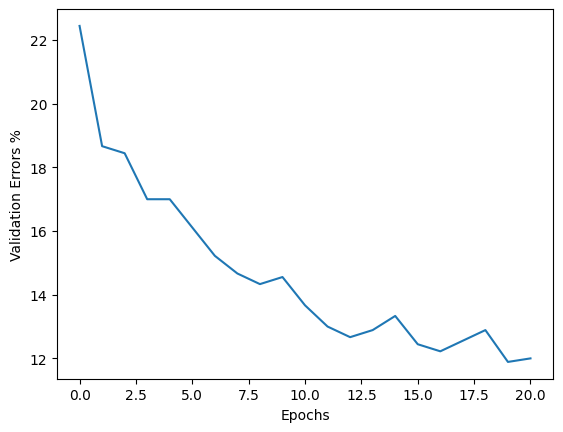

In [ ]:
a=plt.subplot()
a.plot(range(len((emptyarr))),emptyarr)
a.set_ylabel("Validation Errors %")

a.set_xlabel("Epochs")
plt.show()

<b> Report your observations </b>

1. The weight regularization reduces the overfitting of the model and improves the testing accuracy of the model.

2. However as in this case as we take a large amount of training data, The improvement is very small.

3. Dropout method is to accelerate the updation of the weights of the hidden layers. As the errors are back propagated, By the time they reach the outermost hidden layer, The updations corresponding to them become minimal. Therefore, We can observe here that all the weights are getting updated better compared to including all the nodes in the backpropagation.

4. As the number of epochs increase, the training error of the model decreases. However the testing error decreses at first and then increases after a certain instant. We stop training the model after this epoch.

5. In the early stopping method we stop the iterations as soon as the testing errors tend to increase.

6. However as we can observe there can be small pertubrations in the errors, Therefore we allow the testing errors to increase only a certain limit of times i.e 5 in this case.





<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



(1000, 1)


 Accuracy with Logistic Regression: 99.8 




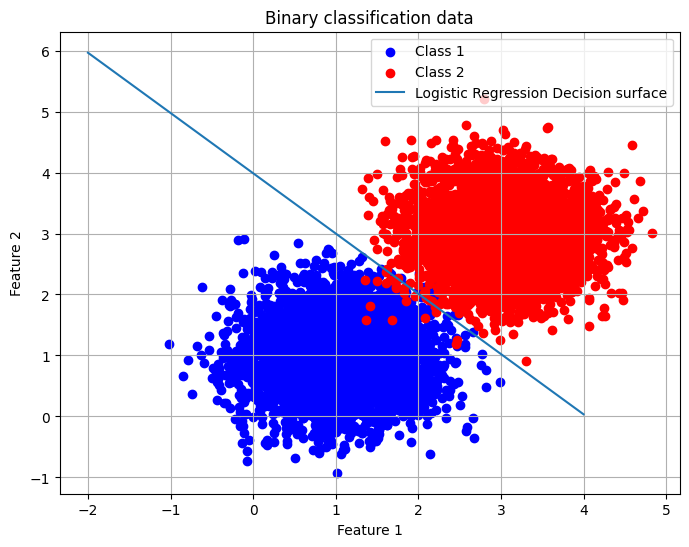

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])




def LS_hard(Y_pred, a, b):
    c = []
    for i in Y_pred:
        if abs(a - i) > abs(b - i):
            c.append(b)
        else:
            c.append(a)
    return np.reshape(c, Y_pred.shape)

def sigmoid(a):
  return 1/(1+np.exp(-a))

def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data
  max_iter = 100 #max number of ierations for parameter update
  threshold = 0 #threshold for classification
  X=np.hstack((np.ones((X_train.shape[0],1)),X_train))
  Y=Y_train.reshape((X_train.shape[0],1))         #Data. Append ones to the training data to take care of the bias
  w = np.reshape([0,0,0],(3,1))         #Initialize the weight vector
  for iter in range(0,max_iter,1):
    t=X@w
    preds = sigmoid(t)   #Predictions on X. Sigmoid(w^T.x)
    t=LS_hard(preds,0,1)
    error = np.linalg.norm(preds-Y_train)   #Difference between preds and Y_train
    R=np.identity(X.shape[0])
    for i in range(X.shape[0]):
      R[i][i]=preds[i,0]*(1-preds[i,0])
    rt=np.linalg.inv(X.T@R@X)
    delt=rt@X.T@(preds-Y)
    w=w-delt
  Xt=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  t=Xt@w
  preds = sigmoid(t)   #Predictions on X. Sigmoid(w^T.x)
  t=LS_hard(preds,0,1)
  print(t.shape)
  #Return the predicted test labels
  return t,w

def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  count=0
  for i in range(Y_test.shape[0]):
    if(Y_test[i]==Y_pred[i]):
      count+=1
  #Compute and return the accuracy
  return (count*100/Y_test.shape[0])

Y_pred,w = Logistic_Regression(tr_data, tr_targets, te_data)
acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')


# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.grid(True)
xvalues=np.linspace(-2,4,1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plt.plot(xvalues,yvalues,label="Logistic Regression Decision surface")
plt.legend()
plt.show()







The training error at 0 epochs is 1.5308641975308745, and training accuracy at 0 epochs is 98.46913580246913
The testing error at 0 epochs is 1.2222222222222285, and testing accuracy at 0 epochs is 98.77777777777777
The training error at 1 epochs is 0.7777777777777715, and training accuracy at 1 epochs is 99.22222222222223
The testing error at 1 epochs is 0.7777777777777715, and testing accuracy at 1 epochs is 99.22222222222223
The training error at 2 epochs is 0.7037037037037095, and training accuracy at 2 epochs is 99.29629629629629
The testing error at 2 epochs is 0.5555555555555571, and testing accuracy at 2 epochs is 99.44444444444444
The training error at 3 epochs is 0.5432098765432016, and training accuracy at 3 epochs is 99.4567901234568
The testing error at 3 epochs is 0.5555555555555571, and testing accuracy at 3 epochs is 99.44444444444444
The training error at 4 epochs is 0.6543209876543159, and training accuracy at 4 epochs is 99.34567901234568
The testing error at 4 epoch

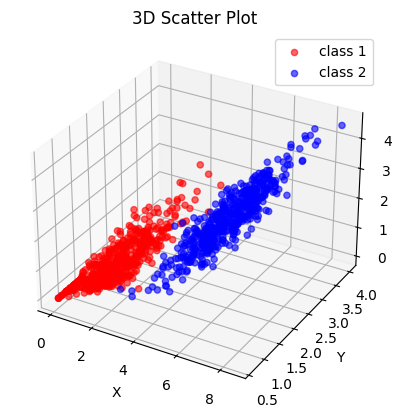

In [ ]:

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

def turntarg(inp):
  inp=np.array(inp)
  g=np.zeros((inp.shape[0],2))
  for t in range(inp.shape[0]):
    g[t,int(inp[t])]=1
  return g

def multitraining(inputs, targets, batch_size = 12, epochs=50, train_val_split=0.8, learning_rate=0.05, h=ReLu,gradh=gradReLu,lamda=0, n_classes = 10):

  #Set the hyperparameters
  hidden_units = 3
  n_samples = inputs.shape[0]
  n_batches = (0.9*n_samples)//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data

  trainx,trainy=inputs[:int(0.9*n_samples)],targets[:int(0.9*n_samples)]
  testx,testy=inputs[int(0.9*n_samples):],targets[int(0.9*n_samples):]

  #Randomly initialize the weights
  W1=np.random.randn(hidden_units,inputs.shape[1])
  W2=np.random.randn(hidden_units,hidden_units)
  W3=np.random.randn(n_classes,hidden_units)
  weights=[W1,W2,W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(trainx.shape[0])
    # Shuffle both arrays simultaneously
    trainxx = trainx[permutation]
    trainyy = trainy[permutation]
    #Interate through the batches of data
    # print("J ",trainxx.shape,trainyy.shape)
    for batch in range(int(n_batches)):
      #Get the batch of data
      start=int(batch*batch_size)
      input=trainxx[start:start+batch_size]
      target=trainyy[start:start+batch_size]
      # print("JK ",input.shape,target.shape)
      # print(target)
      #Forward propagation
      activations = fwdPropagate(input, weights,h,gradh)
      # print("T ",activations[2].shape)

      #Backward propagation
      weights = backPropagate(input, target, weights, activations, learning_rate,h,gradh,lamda)

    #Compute outpus on trianing data
    a,b,outputs=fwdPropagate(trainx, weights,h,gradh)

    #Compute training accuracy, and training error

    outputs=outputs.T

    correct=0
    for i in range(trainx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(trainy[i])):
        correct+=1
    train_acc=(correct/trainx.shape[0])*100
    train_err=100-train_acc


    #Compute outputs on validation data
    #Compute validation accuracy, and validation error
    a,b,outputs=fwdPropagate(testx,weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(testx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(testy[i])):
        correct+=1
    test_acc=(correct/testx.shape[0])*100
    test_err=100-test_acc




    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"The training error at {epoch} epochs is {train_err}, and training accuracy at {epoch} epochs is {train_acc}")
    print(f"The testing error at {epoch} epochs is {test_err}, and testing accuracy at {epoch} epochs is {test_acc}")
    #Save the parameters of network
  return weights




tr_data=np.hstack((np.ones((tr_data.shape[0],1)),tr_data))
tr_targets=turntarg(tr_targets)


permutation = np.random.permutation(tr_data.shape[0])
# Shuffle both arrays simultaneously
tr_data = tr_data[permutation]
tr_targets = tr_targets[permutation]

weights=multitraining(tr_data,tr_targets,h=ReLu,gradh=gradReLu,n_classes=2)

testx=te_data
testx=np.hstack((np.ones((testx.shape[0],1)),te_data))

testy=te_targets
testy=turntarg(te_targets)

a,b,outputs=fwdPropagate(testx,weights,h=ReLu,gradh=gradReLu)


outputs=outputs.T
correct=0
for i in range(testx.shape[0]):
  if(np.argmax(outputs[i])==np.argmax(testy[i])):
    correct+=1
test_acc=(correct/testx.shape[0])*100
test_err=100-test_acc
print(f"The testing error is {test_err}, and testing accuracy is {test_acc}")


x=a[0,:]
y=a[1,:]
z=a[2,:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
num_points_half = x.shape[0] // 2
ax.scatter(x[:num_points_half], y[:num_points_half], z[:num_points_half], alpha=0.6, color='r',label='class 1')
ax.scatter(x[num_points_half:], y[num_points_half:], z[num_points_half:], alpha=0.6, color='b',label='class 2')
ax.legend()

# Setting labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

plt.show()


Observations:-

1. Logistic regression sepeartes linearly seperable data very efficiently. Gives performance of 99% accurate classification.
2. Deep neural networks also seperates the the data with an accuracy of around
99% .
3. Since the complexity of model is less(i.e, linearly seprable data), both are giving excellent performance.

In the below cell we write the new versions of the training functions. These newer functions include the bias parameters. As the input data is only 2 dimensional, We require this. In the previous questions as the input vector itself is very large to express itself as an output bias is not required

In [ ]:


def fwdPropagate3(inputs, weights,h=ReLu,gradh=gradReLu):
  #Inputs: input data, paramters of network
  W1, W2, W3, b1, b2, b3 = weights

  X=inputs.T
  z1=np.dot(W1,X)+b1
  a1=h(z1)
  z2=np.dot(W2,a1)+b2
  a2=h(z2)
  z3=np.dot(W3,a2)+b3
  a3=softmax(z3)
  return a1,a2,a3
  #Return the requires outputs, i.e., final output and intermediate activations



#Complete the below function to compute the gradients
def computeGradients3(inputs, targets, weights, activations,h=ReLu,gradh=gradReLu,lamda=0):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3, b1, b2, b3 = weights


  X=inputs.T
  y=targets.T
  a1,a2,a3=fwdPropagate3(inputs,weights)
  m=inputs.shape[0]

  dz3=(a3-y)
  dw3=(1/m)*np.dot(dz3,a2.T)
  db3=(1/m)*np.sum(dz3, axis = 1, keepdims = True)

  dz2=(1/m)*np.dot(W3.T,dz3)*gradh(a2)
  dw2=(1/m)*np.dot(dz2,a2.T)
  db2=(1/m)*np.sum(dz2, axis = 1, keepdims = True)

  dz1=(1/m)*np.dot(W2.T,dz2)*gradh(a1)
  dw1=(1/m)*np.dot(dz1,X.T)
  db1=(1/m)*np.sum(dz1, axis = 1, keepdims = True)

  return [dw1,dw2,dw3,db1,db2,db3]



#Complete the below function to update the parameters using the above computed gradients
def applyGradients3(weights, gradients, learning_rate,h=ReLu,gradh=gradReLu,lamda=0):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3, b1, b2, b3 = weights
  dj_dw1, dj_dw2, dj_dw3, db1,db2, db3 = gradients
  W1=W1-learning_rate*(dj_dw1+lamda*W1)
  W2=W2-learning_rate*(dj_dw2+lamda*W2)
  W3=W3-learning_rate*(dj_dw3+lamda*W3)
  b1=b1-learning_rate*(db1+lamda*b1)
  b2=b2-learning_rate*(db2+lamda*b2)
  b3=b3-learning_rate*(db3+lamda*b3)
  #Return the updated parameters
  return [W1, W2, W3,b1, b2, b3]

#Complete the below function to complete the backpropagation step
def backPropagate3(inputs, targets, weights, activations, learning_rate,h=ReLu,gradh=gradReLu,lamda=0):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients3(inputs, targets, weights, activations,h=h,gradh=gradReLu,lamda=lamda)
  weights = applyGradients3(weights, gradients, learning_rate,h=ReLu,gradh=gradReLu,lamda=lamda)
  #Update the paramters using gradients

  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training3(inputs, targets, batch_size = 128, epochs=10, train_val_split=0.9, learning_rate=0.005, h=ReLu,gradh=gradReLu,lamda=0, n_classes = 10):

  #Set the hyperparameters
  hidden_units = 3
  n_samples = inputs.shape[0]
  n_batches = (0.9*n_samples)//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data


  trainx,trainy=inputs[:int(0.9*n_samples)],targets[:int(0.9*n_samples)]
  testx,testy=inputs[int(0.9*n_samples):],targets[int(0.9*n_samples):]

  #Randomly initialize the weights
  W1=np.random.randn(hidden_units,inputs.shape[1])
  W2=np.random.randn(hidden_units,hidden_units)
  W3=np.random.randn(n_classes,hidden_units)
  b1=np.random.randn(hidden_units,1)
  b2=np.random.randn(hidden_units,1)
  b3=np.random.randn(n_classes,1)
  weights=[W1,W2,W3,b1,b2,b3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation = np.random.permutation(trainx.shape[0])
    # Shuffle both arrays simultaneously
    trainxx = trainx[permutation]
    trainyy = trainy[permutation]
    #Interate through the batches of data
    # print("J ",trainxx.shape,trainyy.shape)
    for batch in range(int(n_batches)):
      #Get the batch of data
      start=int(batch*batch_size)
      input=trainxx[start:start+batch_size]
      target=trainyy[start:start+batch_size]
      # print("JK ",input.shape,target.shape)
      # print(target)
      #Forward propagation
      activations = fwdPropagate3(input, weights,h,gradh)
      # print("T ",activations[2].shape)

      #Backward propagation
      weights = backPropagate3(input, target, weights, activations, learning_rate,h,gradh,lamda)

    #Compute outpus on trianing data
    a,b,outputs=fwdPropagate3(trainx, weights,h,gradh)

    #Compute training accuracy, and training error

    outputs=outputs.T

    correct=0
    for i in range(trainx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(trainy[i])):
        correct+=1
    train_acc=(correct/trainx.shape[0])*100
    train_err=100-train_acc


    #Compute outputs on validation data
    #Compute validation accuracy, and validation error
    a,b,outputs=fwdPropagate3(testx,weights,h,gradh)
    outputs=outputs.T

    correct=0
    for i in range(testx.shape[0]):
      if(np.argmax(outputs[i])==np.argmax(testy[i])):
        correct+=1
    test_acc=(correct/testx.shape[0])*100
    test_err=100-test_acc




    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"The training error at {epoch} epochs is {train_err}, and training accuracy at {epoch} epochs is {train_acc}")
    print(f"The testing error at {epoch} epochs is {test_err}, and testing accuracy at {epoch} epochs is {test_acc}")
    #Save the parameters of network
  return weights


def turntarg(inp):
  inp=np.array(inp)
  g=np.zeros((inp.shape[0],2))
  for t in range(inp.shape[0]):
    g[t,int(inp[t])]=1
  return g

[[-0.91692841 -3.05287691]
 [-1.64405774  1.05475992]
 [ 0.79441336  0.7920877 ]
 ...
 [-7.12999074  1.04240476]
 [-3.99205848  5.07238375]
 [-0.11037048 -8.6448012 ]]
[0. 0. 0. ... 1. 1. 1.]


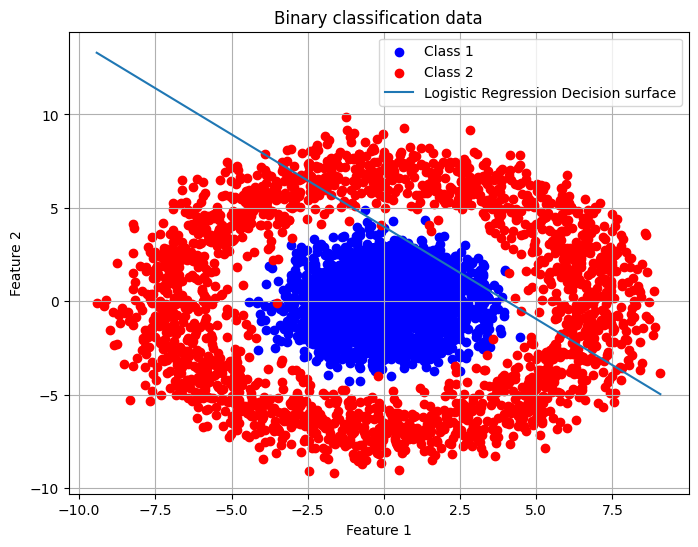

(4000, 2)
(4000,)
The training error at 0 epochs is 29.83333333333333, and training accuracy at 0 epochs is 70.16666666666667
The testing error at 0 epochs is 34.75, and testing accuracy at 0 epochs is 65.25
The training error at 1 epochs is 16.805555555555557, and training accuracy at 1 epochs is 83.19444444444444
The testing error at 1 epochs is 18.75, and testing accuracy at 1 epochs is 81.25
The training error at 2 epochs is 10.833333333333329, and training accuracy at 2 epochs is 89.16666666666667
The testing error at 2 epochs is 12.25, and testing accuracy at 2 epochs is 87.75


<ipython-input-70-e40f3a27f5aa>:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g[t,int(inp[t])]=1


The training error at 3 epochs is 7.166666666666671, and training accuracy at 3 epochs is 92.83333333333333
The testing error at 3 epochs is 8.0, and testing accuracy at 3 epochs is 92.0
The training error at 4 epochs is 6.25, and training accuracy at 4 epochs is 93.75
The testing error at 4 epochs is 7.25, and testing accuracy at 4 epochs is 92.75
The training error at 5 epochs is 5.5, and training accuracy at 5 epochs is 94.5
The testing error at 5 epochs is 6.5, and testing accuracy at 5 epochs is 93.5
The training error at 6 epochs is 3.7777777777777857, and training accuracy at 6 epochs is 96.22222222222221
The testing error at 6 epochs is 4.75, and testing accuracy at 6 epochs is 95.25
The training error at 7 epochs is 5.666666666666657, and training accuracy at 7 epochs is 94.33333333333334
The testing error at 7 epochs is 4.75, and testing accuracy at 7 epochs is 95.25
The training error at 8 epochs is 7.694444444444443, and training accuracy at 8 epochs is 92.30555555555556
Th

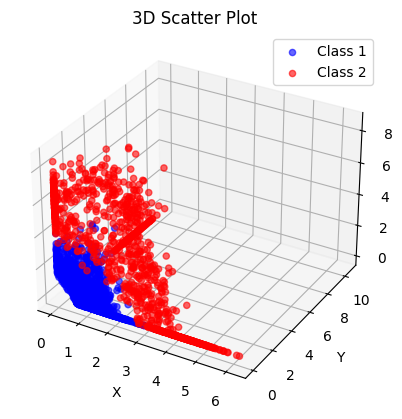

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)


tr_data = np.concatenate([class1_data, class2_data], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])

class1te_data, class2te_data = generate_concentric_data(n_samples//2, radius1,radius2,noise_std)


te_data = np.concatenate([class1te_data, class2te_data], axis=0)
te_targets = np.concatenate([np.zeros(len(class1te_data)), np.ones(len(class2te_data))])


print(tr_data)
print(tr_targets)



# Y_pred,w = Logistic_Regression(tr_data, tr_targets, te_data)
# acc = LR_Accuracy(te_targets, Y_pred)
# print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.grid(True)
xvalues=np.linspace(min(class2_data[:, 0]),max(class2_data[:, 0]),1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plt.plot(xvalues,yvalues,label="Logistic Regression Decision surface")
plt.legend()
plt.show()



print(tr_data.shape)


permutation = np.random.permutation(tr_data.shape[0])
# Shuffle both arrays simultaneously
tr_data = tr_data[permutation]
tr_targets = tr_targets[permutation]



# tr_data=np.hstack((np.ones((tr_data.shape[0],1)),tr_data))
print(tr_targets.shape)
tr_targets=np.reshape(tr_targets,(tr_targets.shape[0],1))
tr_targets=turntarg(tr_targets)


weights=training3(tr_data,tr_targets, h=ReLu,gradh=gradReLu,n_classes=2,epochs=100,batch_size = 12,learning_rate=0.05)

testx=te_data
# testx=np.hstack((np.ones((testx.shape[0],1)),te_data))


testy=te_targets
testy=np.reshape(testy,(testy.shape[0],1))
testy=turntarg(testy)
# permutation = np.random.permutation(testx.shape[0])
# # Shuffle both arrays simultaneously
# testx = testx[permutation]
# testy= testy[permutation]

a,b,outputs=fwdPropagate3(testx,weights, h=ReLu,gradh=gradReLu)


# print(outputs)
# print(testy)
outputs=outputs.T
correct=0
for i in range(testx.shape[0]):
  if(np.argmax(outputs[i])==np.argmax(testy[i])):
    correct+=1
test_acc=(correct/testx.shape[0])*100
test_err=100-test_acc
print(f"The testing error is {test_err}, and testing accuracy is {test_acc}")

print(a.shape)


x=a[0,:]
y=a[1,:]
z=a[2,:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
num_points_half = x.shape[0] // 2
ax.scatter(x[:num_points_half], y[:num_points_half], z[:num_points_half], alpha=0.6,  color='blue', label='Class 1')
ax.scatter(x[num_points_half:], y[num_points_half:], z[num_points_half:], alpha=0.6, color='red',label='Class 2')
# ax.view_init(elev=75,azim=60);
# Setting labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
ax.legend()

plt.show()

# print(weights)


[[ 0.63661962  2.10880513]
 [ 1.45832586  1.06054344]
 [ 0.52677364  4.0279559 ]
 ...
 [-0.26998221  5.90452274]
 [ 0.95155915 -9.86863053]
 [ 6.21036607  2.22337925]]
[0. 0. 0. ... 1. 1. 1.]
(2000, 1)


 Accuracy with Logistic Regression: 50.8 




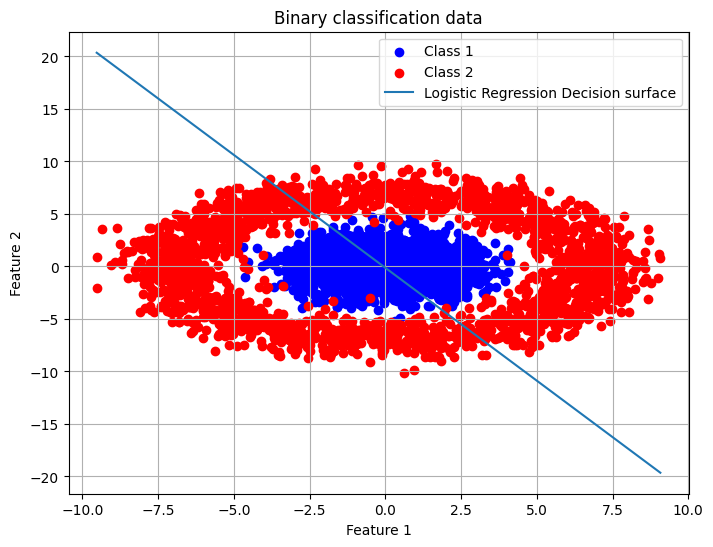

In [2]:

##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)


tr_data = np.concatenate([class1_data, class2_data], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])

class1te_data, class2te_data = generate_concentric_data(n_samples//2, radius1,radius2,noise_std)


te_data = np.concatenate([class1te_data, class2te_data], axis=0)
te_targets = np.concatenate([np.zeros(len(class1te_data)), np.ones(len(class2te_data))])


print(tr_data)
print(tr_targets)


def LS_hard(Y_pred, a, b):
    c = []
    for i in Y_pred:
        if abs(a - i) > abs(b - i):
            c.append(b)
        else:
            c.append(a)
    return np.reshape(c, Y_pred.shape)

def sigmoid(a):
  return 1/(1+np.exp(-a))


def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data
  max_iter = 100 #max number of ierations for parameter update
  threshold = 0 #threshold for classification
  X=np.hstack((np.ones((X_train.shape[0],1)),X_train))
  Y=Y_train.reshape((X_train.shape[0],1))         #Data. Append ones to the training data to take care of the bias
  w = np.reshape([0,0,0],(3,1))         #Initialize the weight vector
  for iter in range(0,max_iter,1):
    t=X@w
    preds = sigmoid(t)   #Predictions on X. Sigmoid(w^T.x)
    t=LS_hard(preds,0,1)
    error = np.linalg.norm(preds-Y_train)   #Difference between preds and Y_train
    R=np.identity(X.shape[0])
    for i in range(X.shape[0]):
      R[i][i]=preds[i,0]*(1-preds[i,0])
    rt=np.linalg.inv(X.T@R@X)
    delt=rt@X.T@(preds-Y)
    w=w-delt
  Xt=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  t=Xt@w
  preds = sigmoid(t)   #Predictions on X. Sigmoid(w^T.x)
  t=LS_hard(preds,0,1)
  print(t.shape)
  #Return the predicted test labels
  return t,w

def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  count=0
  for i in range(Y_test.shape[0]):
    if(Y_test[i]==Y_pred[i]):
      count+=1
  #Compute and return the accuracy
  return (count*100/Y_test.shape[0])


Y_pred,w = Logistic_Regression(tr_data, tr_targets, te_data)
acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.grid(True)
xvalues=np.linspace(min(class2_data[:, 0]),max(class2_data[:, 0]),1000)
yvalues=((-w[0,0]-w[1,0]*xvalues)/w[2,0])
plt.plot(xvalues,yvalues,label="Logistic Regression Decision surface")
plt.legend()
plt.show()


<b> Report your observations </b>

1. Logistic regression couldn't seperate the non-linearly seperable (concentric) data. It is best suitable to seperate linearly seperable data.
2. The accuracy is around 50 % in this case using logistic regression and it's almost passing through the centre of the concentric circles.
3. Using deep neural networking with 2 hidden layers (3 layer feed forward network), the non-linear data is getting seperated with a good enough accuracy around 90-99%.
4. The 2 features in each input are transformed to higher dimension and then weights are updated accordingly.
5. When we plot the hidden activations (3d plot), we can see that both classes are sepearted and a plane can clearly seperate them.
6. Deep neural networks can be used with the suitable activation and objective function based on the non-linearity complexity of model.
7. Always ensure that the weights are initialized properly. As the initial guesses play an important role towards the convergence of the optimal solution.
8. Pretraining can be used to set the initial parameters of the model using auto encoders.
